In [12]:
import pandas as pd
from io import StringIO
pd.set_option('display.max_columns', None)

In [13]:
#Import dataframe
df_100pos = pd.read_csv('DataFiles/merged_df_100pos.csv', low_memory=False)
df_anthro_players = pd.read_csv('DataFiles/player_anthro.csv', low_memory=False)


In [14]:
# common column is 'PLAYER_ID'
merged_df = pd.merge(df_100pos, df_anthro_players, on='PLAYER_NAME')
merged_df

,PLAYER_ID_x,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION_x,HEIGHT,WEIGHT_x,FROM_YEAR,TO_YEAR,TEMP_PLAYER_ID,PLAYER_ID_y,FIRST_NAME,LAST_NAME,POSITION_y,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT_y,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,SeasonYear,HAND_WIDTH_FILLED,HAND_LENGTH_FILLED
0,244,Dee Brown,1610612738,BOS,28.0,21,4,17,0.190,48.5,5.7,15.4,0.367,1.9,6.0,0.308,1.7,2.0,0.818,0.7,3.7,4.5,6.2,2.2,2.9,0.7,0.6,4.2,0.0,14.9,1996-97,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769
1,244,Dee Brown,1610612761,TOR,29.0,72,21,51,0.292,49.1,7.0,16.0,0.438,3.1,7.7,0.399,1.7,2.0,0.817,0.7,3.7,4.3,4.4,2.1,2.3,0.7,0.3,3.5,0.0,18.8,1997-98,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769
2,244,Dee Brown,1610612761,TOR,30.0,49,23,26,0.469,51.4,7.0,18.4,0.378,5.0,13.0,0.387,1.5,2.0,0.727,0.6,3.3,3.8,5.3,3.0,2.1,0.3,0.3,2.8,0.0,20.5,1998-99,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769
3,244,Dee Brown,1610612761,TOR,31.0,38,20,18,0.526,49.5,6.8,18.9,0.360,4.9,13.7,0.358,0.8,1.2,0.688,0.7,3.3,4.0,6.3,2.9,1.8,0.4,1.0,4.5,0.1,19.4,1999-00,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769
4,244,Dee Brown,1610612761,TOR,31.0,3,0,3,0.000,51.1,0.0,10.5,0.000,0.0,7.9,0.000,0.0,0.0,0.000,0.0,5.3,5.3,5.3,2.6,5.3,0.0,0.0,10.5,0.0,0.0,1999-00,Playoffs,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,1631106,Tari Eason,1610612745,HOU,22.0,82,22,60,0.268,46.9,7.9,17.5,0.448,1.6,4.6,0.343,2.9,3.9,0.752,5.2,8.0,13.2,2.3,2.7,2.5,1.2,1.8,5.0,2.9,20.2,2022-23,Regular Season,Louisiana State,USA,2022,1,17,17,F,6-8,215.0,2022,2023,1631106.0,1631106,Tari,Eason,PF,78.75,6' 6.75'',80.00,6' 8.00'',217.4,86.00,7' 2.00'',107.5,8' 11.50'',5.9,9.25,11.00,2022-23,11.000000,9.250000
7790,1631211,Trevor Keels,1610612752,NYK,19.0,3,3,0,1.000,42.3,5.3,21.1,0.250,5.3,21.1,0.250,0.0,0.0,0.000,0.0,10.5,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.8,2022-23,Regular Season,Duke,USA,2022,2,42,3,G,6-4,221.0,2022,2022,1631211.0,1631211,Trevor,Keels,SG,75.25,6' 3.25'',76.75,6' 4.75'',223.8,79.25,6' 7.25'',101.0,8' 5.00'',13.5,8.25,9.00,2022-23,9.000000,8.250000
7791,1631102,TyTy Washington Jr.,1610612745,HOU,21.0,31,6,25,0.194,47.4,6.4,17.5,0.363,2.1,8.8,0.238,1.1,2.0,0.556,0.2,4.7,4.9,5.1,1.5,1.6,0.2,0.4,3.2,2.0,15.9,2022-23,Regular Season,Kentucky,USA,2022,1,29,23,G,6-3,195.0,2022,2023,1631102.0,1631102,TyTy,Washington Jr.,SG,74.25,6' 2.25'',75.75,6' 3.75'',196.4,80.00,6' 8.00'',99.5,8' 3.50'',12.0,8.50,9.25,2022-23,9.250000,8.500000
7792,1631213,Tyrese Martin,1610612737,ATL,24.0,16,10,6,0.625,48.5,6.7,17.0,0.391,0.7,5.2,0.143,1.5,1.5,1.000,3.7,5.2,8.9,1.5,1.5,0.7,0.0,1.5,1.5,0.7,15.6,2022-23,Regular Season,Connecticut,USA,2022,2,51,22,G,6-6,215.0,2022,2022,1631213.0,1631213,Tyrese,Martin,SG-SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,9.418394,8.723769


In [15]:
# Adding additional advanced metric columns

# Shooting efficiency
merged_df['FG3A%'] = merged_df['FG3A'] / merged_df['FGA']
merged_df['PTS/FGA'] = merged_df['PTS'] / merged_df['FGA']
merged_df['FG3M/FGM'] = merged_df['FG3M'] / merged_df['FGM']
merged_df['FTA/FGA'] = merged_df['FTA'] / merged_df['FGA']


# True Shooting Percentage
merged_df['TRU%'] = 0.5 * merged_df['PTS'] / (merged_df['FGA'] + 0.475 * merged_df['FTA'])

# Assists to Turnover Ratio
merged_df['AST_TOV'] = merged_df['AST'] / merged_df['TOV']

merged_df['POSSESSION'] = merged_df.apply(lambda row: row['FGA'] + 0.44 * row['FTA'] - row['OREB'] + row['TOV'], axis=1)

merged_df[(merged_df['PLAYER_NAME'] == 1629029)]
merged_df

,PLAYER_ID_x,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION_x,HEIGHT,WEIGHT_x,FROM_YEAR,TO_YEAR,TEMP_PLAYER_ID,PLAYER_ID_y,FIRST_NAME,LAST_NAME,POSITION_y,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT_y,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,SeasonYear,HAND_WIDTH_FILLED,HAND_LENGTH_FILLED,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION
0,244,Dee Brown,1610612738,BOS,28.0,21,4,17,0.190,48.5,5.7,15.4,0.367,1.9,6.0,0.308,1.7,2.0,0.818,0.7,3.7,4.5,6.2,2.2,2.9,0.7,0.6,4.2,0.0,14.9,1996-97,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.389610,0.967532,0.333333,0.129870,0.455657,2.818182,17.780
1,244,Dee Brown,1610612761,TOR,29.0,72,21,51,0.292,49.1,7.0,16.0,0.438,3.1,7.7,0.399,1.7,2.0,0.817,0.7,3.7,4.3,4.4,2.1,2.3,0.7,0.3,3.5,0.0,18.8,1997-98,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.481250,1.175000,0.442857,0.125000,0.554572,2.095238,18.280
2,244,Dee Brown,1610612761,TOR,30.0,49,23,26,0.469,51.4,7.0,18.4,0.378,5.0,13.0,0.387,1.5,2.0,0.727,0.6,3.3,3.8,5.3,3.0,2.1,0.3,0.3,2.8,0.0,20.5,1998-99,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.706522,1.114130,0.714286,0.108696,0.529716,1.766667,21.680
3,244,Dee Brown,1610612761,TOR,31.0,38,20,18,0.526,49.5,6.8,18.9,0.360,4.9,13.7,0.358,0.8,1.2,0.688,0.7,3.3,4.0,6.3,2.9,1.8,0.4,1.0,4.5,0.1,19.4,1999-00,Regular Season,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.724868,1.026455,0.720588,0.063492,0.498202,2.172414,21.628
4,244,Dee Brown,1610612761,TOR,31.0,3,0,3,0.000,51.1,0.0,10.5,0.000,0.0,7.9,0.000,0.0,0.0,0.000,0.0,5.3,5.3,5.3,2.6,5.3,0.0,0.0,10.5,0.0,0.0,1999-00,Playoffs,Jacksonville,USA,1990,1,19,7,G,6-2,205.0,1990,2001,NaN,200793,Dee,Brown,PG-SG,71.00,5' 11'',72.00,6' 0'',179.0,74.00,6' 2'',94.0,7' 10'',NaN,NaN,NaN,2005-06,9.418394,8.723769,0.752381,0.000000,NaN,0.000000,0.000000,2.038462,13.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7789,1631106,Tari Eason,1610612745,HOU,22.0,82,22,60,0.268,46.9,7.9,17.5,0.448,1.6,4.6,0.343,2.9,3.9,0.752,5.2,8.0,13.2,2.3,2.7,2.5,1.2,1.8,5.0,2.9,20.2,2022-23,Regular Season,Louisiana State,USA,2022,1,17,17,F,6-8,215.0,2022,2023,1631106.0,1631106,Tari,Eason,PF,78.75,6' 6.75'',80.00,6' 8.00'',217.4,86.00,7' 2.00'',107.5,8' 11.50'',5.9,9.25,11.00,2022-23,11.000000,9.250000,0.262857,1.154286,0.202532,0.222857,0.521896,0.851852,16.716
7790,1631211,Trevor Keels,1610612752,NYK,19.0,3,3,0,1.000,42.3,5.3,21.1,0.250,5.3,21.1,0.250,0.0,0.0,0.000,0.0,10.5,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.8,2022-23,Regular Season,Duke,USA,2022,2,42,3,G,6-4,221.0,2022,2022,1631211.0,1631211,Trevor,Keels,SG,75.25,6' 3.25'',76.75,6' 4.75'',223.8,79.25,6' 7.25'',101.0,8' 5.00'',13.5,8.25,9.00,2022-23,9.000000,8.250000,1.000000,0.748815,1.000000,0.000000,0.374408,NaN,21.100
7791,1631102,TyTy Washington Jr.,1610612745,HOU,21.0,31,6,25,0.194,47.4,6.4,17.5,0.363,2.1,8.8,0.238,1.1,2.0,0.556,0.2,4.7,4.9,5.1,1.5,1.6,0.2,0.4,3.2,2.0,15.9,2022-23,Regular Season,Kentucky,USA,2022,1,29,23,G,6-3,195.0,2022,

In [16]:
# Replacing intermediary positions with one. All in all there are 3 positions - C, F and G. 
merged_df['POSITION'] = merged_df['POSITION_x'].str.replace('F-C', 'F').replace('C-F', 'C').replace('F-G', 'F').replace('G-F', 'G')

In [17]:
# Number of positions per unique European player:
europe_F_regular.groupby('POSITION_x')['PLAYER_ID_x'].nunique()


NameError: name 'europe_F_regular' is not defined

In [21]:
# European countries in basketball sense
europe = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
  'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland',
  'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
  'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
  'United Kingdom', 'Norway', 'Switzerland', 'Belarus', 'Russia', 'Ukraine',
  'Moldova', 'Georgia', 'Armenia', 'Azerbaijan', 'Turkey', 'Israel', 'Albania',
  'Macedonia', 'Serbia', 'Montenegro', 'Bosnia and Herzegovina', 'Iceland']

In [22]:
# Define function for European countries
def filter_europe(df, column_name, europe):
    return df[df[column_name].isin(europe)]

In [73]:
# New object for European players playing at F in regular season games:
europe_F_regular = filter_europe(merged_df, 'COUNTRY', europe)
europe_F_regular = europe_F_regular.loc[europe_F_regular['POSITION'].isin(['F']) & europe_F_regular['Season'].isin(['Regular Season'])]

In [24]:
# Define function for non-european countries
def filter_non_europe(df, column_name='COUNTRY', country_list=europe):
    return df[~df[column_name].isin(europe)]

In [25]:
# New object for Non-europe players playing at F in regular season games:
non_europe_F_regular = filter_non_europe(merged_df)
non_europe_F_regular = non_europe_F_regular.loc[non_europe_F_regular['POSITION'].isin(['F']) & non_europe_F_regular['Season'].isin(['Regular Season'])]

In [26]:
# Number of positions per unique European player:
europe_F_regular.groupby('COUNTRY')['PLAYER_ID_x'].nunique()


COUNTRY
Croatia           1
Finland           1
France            4
Georgia           1
Germany           1
Greece            3
Israel            1
Lithuania         1
Poland            1
Serbia            1
Turkey            1
Ukraine           1
United Kingdom    3
Name: PLAYER_ID_x, dtype: int64

In [72]:
europe_F_regular

,PLAYER_ID_x,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION_x,HEIGHT,WEIGHT_x,FROM_YEAR,TO_YEAR,TEMP_PLAYER_ID,PLAYER_ID_y,FIRST_NAME,LAST_NAME,POSITION_y,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT_y,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,SeasonYear,HAND_WIDTH_FILLED,HAND_LENGTH_FILLED,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION,POSITION,Europe
243,2238,Antonis Fotsis,1610612763,MEM,21.0,28,6,22,0.214,50.4,6.7,16.5,0.404,1.1,3.7,0.304,2.7,3.2,0.850,4.0,5.9,9.8,1.6,3.3,1.4,1.7,1.4,3.5,0.0,17.1,2001-02,Regular Season,NaN,Greece,2001,2,47,6,F,6-10,219.0,2001,2001,NaN,2238,Antonis,Fotsis,SF,81.25,6' 9.25'',NaN,NaN,219.0,80.50,6' 8.5'',106.0,8' 10'',NaN,NaN,NaN,2000-01,9.418394,8.723769,0.224242,1.036364,0.164179,0.193939,0.474473,0.484848,17.208,F,European
1105,2443,Darius Songaila,1610612758,SAC,26.0,73,49,24,0.671,50.6,6.9,14.2,0.487,0.0,0.0,0.000,3.7,4.6,0.807,4.7,7.0,11.7,2.5,2.2,2.2,0.6,1.9,6.5,0.0,17.5,2003-04,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.000000,1.232394,0.000000,0.323944,0.534025,1.136364,13.724,F,European
1107,2443,Darius Songaila,1610612758,SAC,27.0,81,50,31,0.617,51.2,7.9,15.1,0.527,0.0,0.1,0.000,2.9,3.4,0.847,3.9,6.8,10.6,3.5,2.2,1.6,0.6,1.3,6.4,0.0,18.8,2004-05,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.006623,1.245033,0.000000,0.225166,0.562369,1.590909,14.896,F,European
1109,2443,Darius Songaila,1610612741,CHI,28.0,62,27,35,0.435,50.9,9.0,18.8,0.481,0.1,0.2,0.400,3.6,4.4,0.817,2.9,6.5,9.4,3.4,3.3,1.3,0.6,0.8,6.0,4.5,21.8,2005-06,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.010638,1.159574,0.011111,0.234043,0.521781,1.030303,21.136,F,European
1110,2443,Darius Songaila,1610612764,WAS,29.0,37,14,23,0.378,50.0,8.4,16.1,0.524,0.0,0.1,0.000,3.3,3.9,0.852,3.1,6.4,9.6,2.7,3.1,1.2,0.7,1.1,7.5,3.3,20.1,2006-07,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.006211,1.248447,0.000000,0.242236,0.559811,0.870968,17.816,F,European
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7717,1630582,Yves Pons,1610612763,MEM,23.0,12,9,3,0.750,45.5,3.2,10.3,0.313,1.9,5.8,0.333,0.0,1.3,0.000,3.2,4.5,7.7,0.6,0.6,0.6,2.6,0.6,3.8,1.9,8.3,2021-22,Regular Season,Tennessee,France,Undrafted,Undrafted,Undrafted,5,F,6-5,206.0,2021,2021,1630582.0,1630582,Yves,Pons,PF,77.50,6'5.5'',78.75,6'6.75'',206.4,84.75,7'0.75'',104.0,8'8.0'',4.0,9.00,9.25,2021-22,9.250000,9.000000,0.563107,0.805825,0.593750,0.126214,0.380124,1.000000,8.272,F,European
7750,1631110,Jeremy Sochan,1610612759,SAS,20.0,56,15,41,0.268,47.0,8.1,17.8,0.453,1.1,4.3,0.246,2.6,3.7,0.698,3.1,6.4,9.5,4.6,3.1,1.4,0.7,1.5,4.5,3.2,19.8,2022-23,Regular Season,Baylor,Poland,2022,1,9,10,F,6-8,230.0,2022,2023,1631110.0,1631110,Jeremy,Sochan,PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,9.418394,8.723769,0.241573,1.112360,0.135802,0.207865,0.506200,1.483871,19.428,F,European
7771,1631217,Moussa Diabate,1610612746,LAC,21.0,22,10,12,0.455,47.3,5.8,11.4,0.51

In [28]:
# Number of positions per unique US player:
non_europe_F_regular.groupby('POSITION')['PLAYER_ID_x'].nunique()

POSITION
F    384
Name: PLAYER_ID_x, dtype: int64

In [29]:
non_europe_F_regular.head(5)

,PLAYER_ID_x,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION_x,HEIGHT,WEIGHT_x,FROM_YEAR,TO_YEAR,TEMP_PLAYER_ID,PLAYER_ID_y,FIRST_NAME,LAST_NAME,POSITION_y,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT_y,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,SeasonYear,HAND_WIDTH_FILLED,HAND_LENGTH_FILLED,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION,POSITION
11,677,Eric Williams,1610612738,BOS,24.0,72,13,59,0.181,49.9,7.7,16.8,0.456,0.0,0.2,0.250,6.7,8.9,0.752,2.6,4.2,6.7,2.6,2.9,1.5,0.3,1.8,4.4,0.0,22.1,1996-97,Regular Season,Providence,USA,1995,1,14,NaN,F,6-8,220.0,1995,2006,NaN,12203,Eric,Williams,C-PF,79.25,6' 7.25'',80.75,6' 8.75'',285.0,88.25,7' 4.25'',106.5,8' 10.5'',13.0,NaN,NaN,2006-07,9.418394,8.723769,0.011905,1.315476,0.000000,0.529762,0.525502,0.896552,21.016,F
12,677,Eric Williams,1610612743,DEN,25.0,4,0,4,0.000,49.2,8.2,20.7,0.393,0.0,0.0,0.000,10.5,15.3,0.689,3.4,3.7,7.1,4.1,3.1,1.4,0.0,1.7,3.1,0.0,26.9,1997-98,Regular Season,Providence,USA,1995,1,14,NaN,F,6-8,220.0,1995,2006,NaN,12203,Eric,Williams,C-PF,79.25,6' 7.25'',80.75,6' 8.75'',285.0,88.25,7' 4.25'',106.5,8' 10.5'',13.0,NaN,NaN,2006-07,9.418394,8.723769,0.000000,1.299517,0.000000,0.739130,0.480915,1.322581,27.132,F
13,677,Eric Williams,1610612743,DEN,26.0,38,11,27,0.289,52.1,5.4,14.7,0.365,0.4,1.7,0.231,7.5,9.3,0.799,2.3,3.2,5.4,2.5,3.3,1.8,0.5,1.5,5.1,0.0,18.6,1998-99,Regular Season,Providence,USA,1995,1,14,NaN,F,6-8,220.0,1995,2006,NaN,12203,Eric,Williams,C-PF,79.25,6' 7.25'',80.75,6' 8.75'',285.0,88.25,7' 4.25'',106.5,8' 10.5'',13.0,NaN,NaN,2006-07,9.418394,8.723769,0.115646,1.265306,0.074074,0.632653,0.486465,0.757576,19.792,F
14,677,Eric Williams,1610612738,BOS,27.0,68,30,38,0.441,49.0,5.9,13.7,0.427,0.9,2.6,0.347,4.8,6.0,0.793,2.0,3.6,5.5,3.3,2.3,1.6,0.6,1.1,5.9,0.9,17.3,1999-00,Regular Season,Providence,USA,1995,1,14,NaN,F,6-8,220.0,1995,2006,NaN,12203,Eric,Williams,C-PF,79.25,6' 7.25'',80.75,6' 8.75'',285.0,88.25,7' 4.25'',106.5,8' 10.5'',13.0,NaN,NaN,2006-07,9.418394,8.723769,0.189781,1.262774,0.152542,0.437956,0.522659,1.434783,16.640,F
15,677,Eric Williams,1610612738,BOS,28.0,81,36,45,0.444,49.8,4.6,12.8,0.362,1.3,4.0,0.331,4.7,6.6,0.714,1.8,4.1,5.9,3.2,2.2,1.8,0.4,0.9,5.1,0.0,15.3,2000-01,Regular Season,Providence,USA,1995,1,14,NaN,F,6-8,220.0,1995,2006,NaN,12203,Eric,Williams,C-PF,79.25,6' 7.25'',80.75,6' 8.75'',285.0,88.25,7' 4.25'',106.5,8' 10.5'',13.0,NaN,NaN,2006-07,9.418394,8.723769,0.312500,1.195312,0.282609,0.515625,0.480075,1.454545,16.104,F


In [74]:
import altair as alt
import pandas as pd
import altair_saver


# Annahme: Sie haben zwei DataFrames: data_per_min_europe_regular und data_per_min_usa_regular

# Fügen Sie eine neue Spalte hinzu, um anzuzeigen, ob der Spieler Europäer ist oder nicht
europe_F_regular['Europe'] = 'European'
non_europe_F_regular['Europe'] = 'Non-European'

# Kombinieren Sie die beiden DataFrames
combined_df = pd.concat([europe_F_regular, non_europe_F_regular])

# Liste der Metriken, die geplottet werden sollen
metrics = ['FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 
           'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 
           'PF', 'PTS', 'FG3A%', 'PTS/FGA', 'FG3M/FGM', 'FTA/FGA', 
           'TRU%', 'AST_TOV', 'POSSESSION','HAND_WIDTH_FILLED', 'HAND_LENGTH_FILLED','WINGSPAN','HEIGHT_WO_SHOES_FT_IN','AGE']

# Liste zum Speichern der Diagramme
charts = []

# Einen Bruchteil des kombinierten DataFrame auswählen
sampled_df = combined_df.sample(frac=0.5)  # Passen Sie den Bruchteil bei Bedarf an

# Für jede Metrik ein gruppiertes Balkendiagramm erstellen und die Diagramme in eine Liste speichern
for metric in metrics:
    chart = alt.Chart(sampled_df).mark_bar().encode(
        x=alt.X('Europe:N', title='Europe'),
        y=alt.Y(f'median({metric}):Q', title=f'Average {metric}'),
        color=alt.Color('Europe:N', legend=alt.Legend(title='Europe'))
    ).properties(
        title=f'Average {metric} by Europe',
        width=400,
        height=300
    )
    charts.append(chart)

# Diagramme in sechs Zeilen stapeln
alt_row = alt.vconcat(*[alt.hconcat(*charts[i:i+4]) for i in range(0, len(charts), 4)])

# Die Diagramme anzeigen
alt_row


alt.VConcatChart(...)

In [77]:
europe_F_regular['AGE'].min()

20.0

In [78]:
europe_F_regular['AGE'].max()

34.0

In [81]:
europe_F_regular['AGE'].mean()

25.494505494505493

In [79]:
non_europe_F_regular['AGE'].min()

19.0

In [80]:
non_europe_F_regular['AGE'].max()

43.0

In [82]:
non_europe_F_regular['AGE'].mean()

26.022993688007215

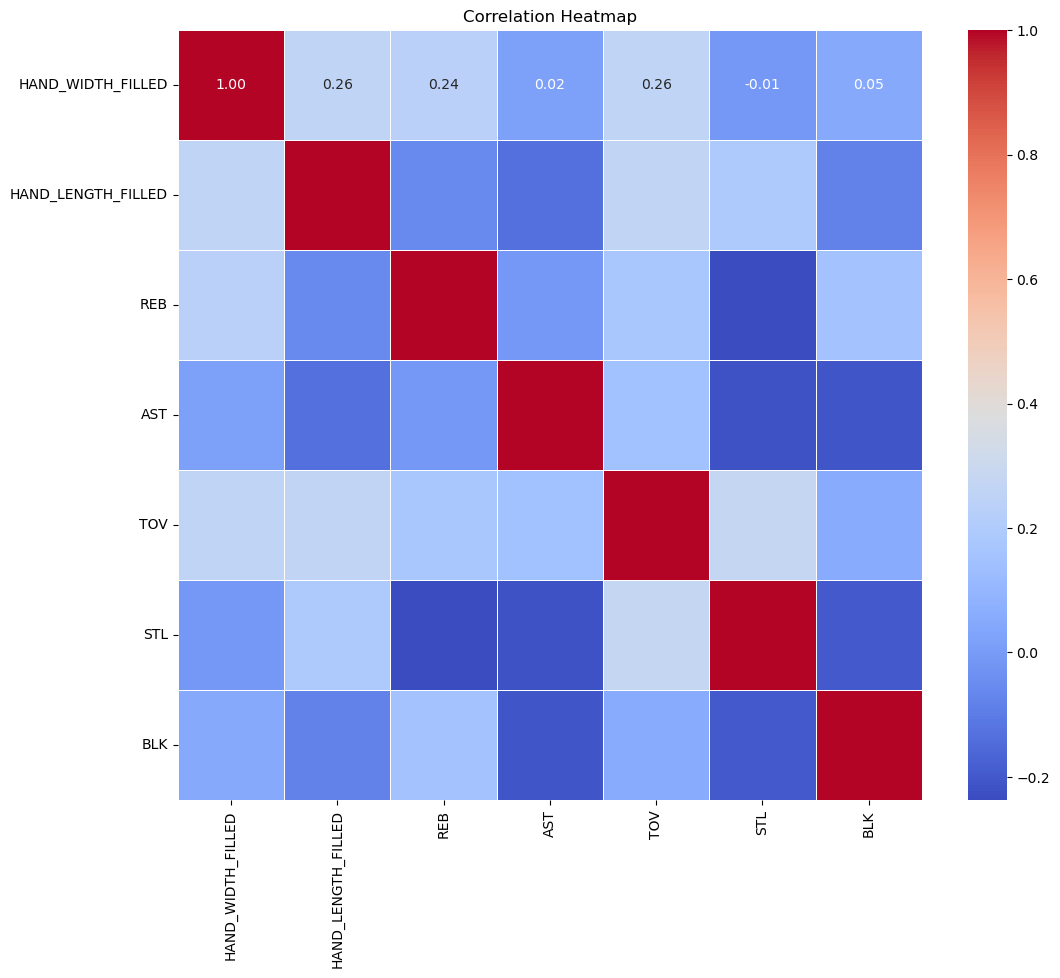

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation analysis
columns_of_interest = ['HAND_WIDTH_FILLED', 'HAND_LENGTH_FILLED', 'REB', 'AST', 'TOV', 'STL', 'BLK']

# Create a subset DataFrame with selected columns
subset_df = europe_F_regular[columns_of_interest]

# Calculate correlation matrix
correlation_matrix = subset_df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


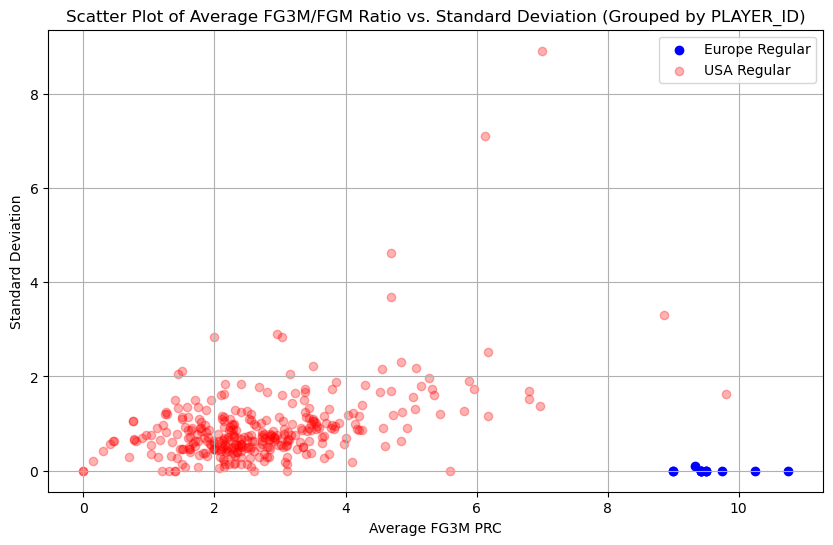

Standard Deviation for Europe: 0.007478630429917433
Standard Deviation for USA: 0.9045888031204778


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate mean and standard deviation for FG3M/FGM for data_per_min_europe_regular
avg_fg3m_fgm_europe = europe_F_regular.groupby('PLAYER_ID_x')['HAND_WIDTH_FILLED'].agg(['mean', 'std'])

# Calculate mean and standard deviation for FG3M/FGM for data_per_min_usa_regular
avg_fg3m_fgm_usa = non_europe_F_regular.groupby('PLAYER_ID_x')['AST'].agg(['mean', 'std'])

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for data_per_min_europe_regular
plt.scatter(avg_fg3m_fgm_europe['mean'], avg_fg3m_fgm_europe['std'], label='Europe Regular', color='blue')

# Scatter plot for data_per_min_usa_regular
plt.scatter(avg_fg3m_fgm_usa['mean'], avg_fg3m_fgm_usa['std'], label='USA Regular', color='red', alpha=0.3)

# Add labels and title
plt.xlabel('Average FG3M PRC')
plt.ylabel('Standard Deviation')
plt.title('Scatter Plot of Average FG3M/FGM Ratio vs. Standard Deviation (Grouped by PLAYER_ID)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


std_europe = avg_fg3m_fgm_europe['std'].mean()
std_usa = avg_fg3m_fgm_usa['std'].mean()

print("Standard Deviation for Europe:", std_europe)
print("Standard Deviation for USA:", std_usa)

In [ ]:
import pandas as pd
import altair as alt

# Calculate mean and standard deviation for AVG AST for data_per_min_europe_regular
avg_ast_std_europe = europe_F_regular.groupby('PLAYER_NAME')['FG3M'].agg(['mean', 'std']).reset_index()

# Calculate mean and standard deviation for AVG AST for data_per_min_usa_regular
avg_ast_std_usa = non_europe_F_regular.groupby('PLAYER_NAME')['FG3M'].agg(['mean', 'std']).reset_index()

# Create scatter plot for data_per_min_europe_regular
scatter_europe = alt.Chart(avg_ast_std_europe).mark_circle(size=60).encode(
    x='mean:Q',
    y='std:Q',
    tooltip=['PLAYER_NAME', 'mean', 'std'],
    color=alt.value('blue'),
    opacity=alt.value(0.8)
).properties(
    width=400,
    height=300,
    title='Scatter Plot of Average FG3M vs. Standard Deviation (Europe Regular)'
)

# Create scatter plot for data_per_min_usa_regular
scatter_usa = alt.Chart(avg_ast_std_usa).mark_circle(size=60).encode(
    x='mean:Q',
    y='std:Q',
    tooltip=['PLAYER_NAME', 'mean', 'std'],
    color=alt.value('red'),
    opacity=alt.value(0.8)
).properties(
    width=400,
    height=300,
    title='Scatter Plot of Average FG3M vs. Standard Deviation (USA Regular)'
)

# Concatenate the plots
scatter_europe | scatter_usa

/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/homebrew/Caskroom/miniconda/base/envs/nf_sql/lib/python3.9/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

In [35]:
import pandas as pd
import altair as alt

# Calculate mean and standard deviation for AVG AST for data_per_min_europe_regular
avg_ast_std_europe = europe_F_regular.groupby('PLAYER_NAME')['FG3M'].agg(['median', 'std']).reset_index()

# Calculate mean and standard deviation for AVG AST for data_per_min_usa_regular
avg_ast_std_usa = non_europe_F_regular.groupby('PLAYER_NAME')['FG3M'].agg(['median', 'std']).reset_index()

# Create scatter plot for data_per_min_europe_regular
scatter_europe = alt.Chart(avg_ast_std_europe).mark_circle(size=60).encode(
    x='median:Q',
    y='std:Q',
    tooltip=['PLAYER_NAME', 'median', 'std'],
    color=alt.value('blue'),
    opacity=alt.value(0.8)
).properties(
    width=400,
    height=300,
    title='Scatter Plot of Average FG3M vs. Standard Deviation (Europe Regular)'
)

# Create scatter plot for data_per_min_usa_regular
scatter_usa = alt.Chart(avg_ast_std_usa).mark_circle(size=60).encode(
    x='median:Q',
    y='std:Q',
    tooltip=['PLAYER_NAME', 'median', 'std'],
    color=alt.value('red'),
    opacity=alt.value(0.8)
).properties(
    width=400,
    height=300,
    title='Scatter Plot of Average FG3M vs. Standard Deviation (USA Regular)'
)

# Concatenate the plots
scatter_europe | scatter_usa

alt.HConcatChart(...)

In [51]:
europe_F_regular

,PLAYER_ID_x,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION_x,HEIGHT,WEIGHT_x,FROM_YEAR,TO_YEAR,TEMP_PLAYER_ID,PLAYER_ID_y,FIRST_NAME,LAST_NAME,POSITION_y,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT_y,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,SeasonYear,HAND_WIDTH_FILLED,HAND_LENGTH_FILLED,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION,POSITION,Europe
243,2238,Antonis Fotsis,1610612763,MEM,21.0,28,6,22,0.214,50.4,6.7,16.5,0.404,1.1,3.7,0.304,2.7,3.2,0.850,4.0,5.9,9.8,1.6,3.3,1.4,1.7,1.4,3.5,0.0,17.1,2001-02,Regular Season,NaN,Greece,2001,2,47,6,F,6-10,219.0,2001,2001,NaN,2238,Antonis,Fotsis,SF,81.25,6' 9.25'',NaN,NaN,219.0,80.50,6' 8.5'',106.0,8' 10'',NaN,NaN,NaN,2000-01,9.418394,8.723769,0.224242,1.036364,0.164179,0.193939,0.474473,0.484848,17.208,F,European
1105,2443,Darius Songaila,1610612758,SAC,26.0,73,49,24,0.671,50.6,6.9,14.2,0.487,0.0,0.0,0.000,3.7,4.6,0.807,4.7,7.0,11.7,2.5,2.2,2.2,0.6,1.9,6.5,0.0,17.5,2003-04,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.000000,1.232394,0.000000,0.323944,0.534025,1.136364,13.724,F,European
1107,2443,Darius Songaila,1610612758,SAC,27.0,81,50,31,0.617,51.2,7.9,15.1,0.527,0.0,0.1,0.000,2.9,3.4,0.847,3.9,6.8,10.6,3.5,2.2,1.6,0.6,1.3,6.4,0.0,18.8,2004-05,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.006623,1.245033,0.000000,0.225166,0.562369,1.590909,14.896,F,European
1109,2443,Darius Songaila,1610612741,CHI,28.0,62,27,35,0.435,50.9,9.0,18.8,0.481,0.1,0.2,0.400,3.6,4.4,0.817,2.9,6.5,9.4,3.4,3.3,1.3,0.6,0.8,6.0,4.5,21.8,2005-06,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.010638,1.159574,0.011111,0.234043,0.521781,1.030303,21.136,F,European
1110,2443,Darius Songaila,1610612764,WAS,29.0,37,14,23,0.378,50.0,8.4,16.1,0.524,0.0,0.1,0.000,3.3,3.9,0.852,3.1,6.4,9.6,2.7,3.1,1.2,0.7,1.1,7.5,3.3,20.1,2006-07,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.006211,1.248447,0.000000,0.242236,0.559811,0.870968,17.816,F,European
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7717,1630582,Yves Pons,1610612763,MEM,23.0,12,9,3,0.750,45.5,3.2,10.3,0.313,1.9,5.8,0.333,0.0,1.3,0.000,3.2,4.5,7.7,0.6,0.6,0.6,2.6,0.6,3.8,1.9,8.3,2021-22,Regular Season,Tennessee,France,Undrafted,Undrafted,Undrafted,5,F,6-5,206.0,2021,2021,1630582.0,1630582,Yves,Pons,PF,77.50,6'5.5'',78.75,6'6.75'',206.4,84.75,7'0.75'',104.0,8'8.0'',4.0,9.00,9.25,2021-22,9.250000,9.000000,0.563107,0.805825,0.593750,0.126214,0.380124,1.000000,8.272,F,European
7750,1631110,Jeremy Sochan,1610612759,SAS,20.0,56,15,41,0.268,47.0,8.1,17.8,0.453,1.1,4.3,0.246,2.6,3.7,0.698,3.1,6.4,9.5,4.6,3.1,1.4,0.7,1.5,4.5,3.2,19.8,2022-23,Regular Season,Baylor,Poland,2022,1,9,10,F,6-8,230.0,2022,2023,1631110.0,1631110,Jeremy,Sochan,PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,9.418394,8.723769,0.241573,1.112360,0.135802,0.207865,0.506200,1.483871,19.428,F,European
7771,1631217,Moussa Diabate,1610612746,LAC,21.0,22,10,12,0.455,47.3,5.8,11.4,0.51

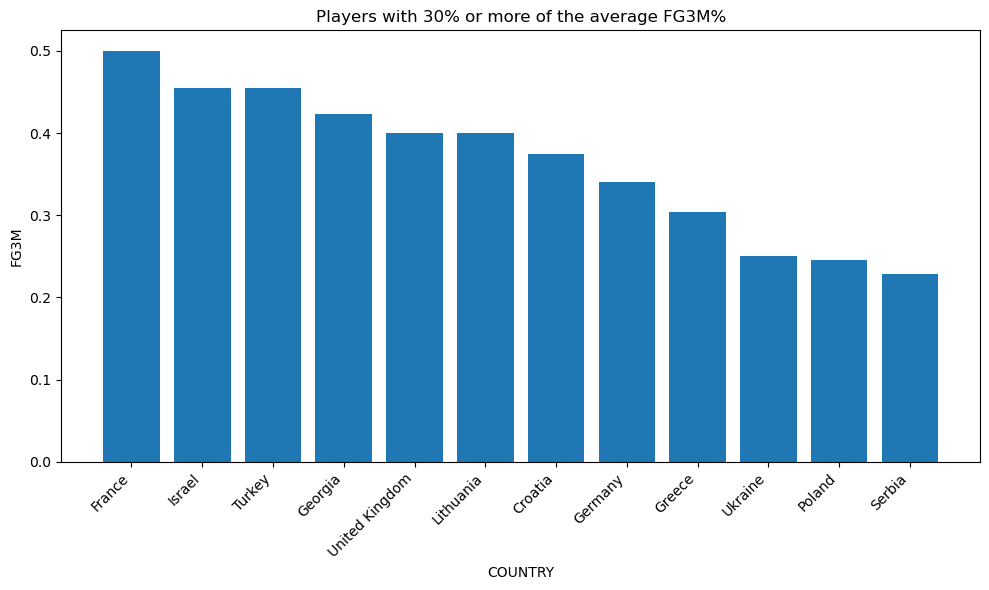

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
europe_F_regular

# Calculate average FG3M%
avg_FG3M_percentage = europe_F_regular['FG3_PCT'].mean()

# Filter players who have 30% or more of the average FG3M%
filtered_players = europe_F_regular[europe_F_regular['FG3_PCT'] >= 0.3 * avg_FG3M_percentage]

filtered_players = filtered_players.sort_values(by='FG3_PCT', ascending=False)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(filtered_players['COUNTRY'], filtered_players['FG3_PCT'])
plt.xlabel('COUNTRY')
plt.ylabel('FG3M')
plt.title('Players with 30% or more of the average FG3M%')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


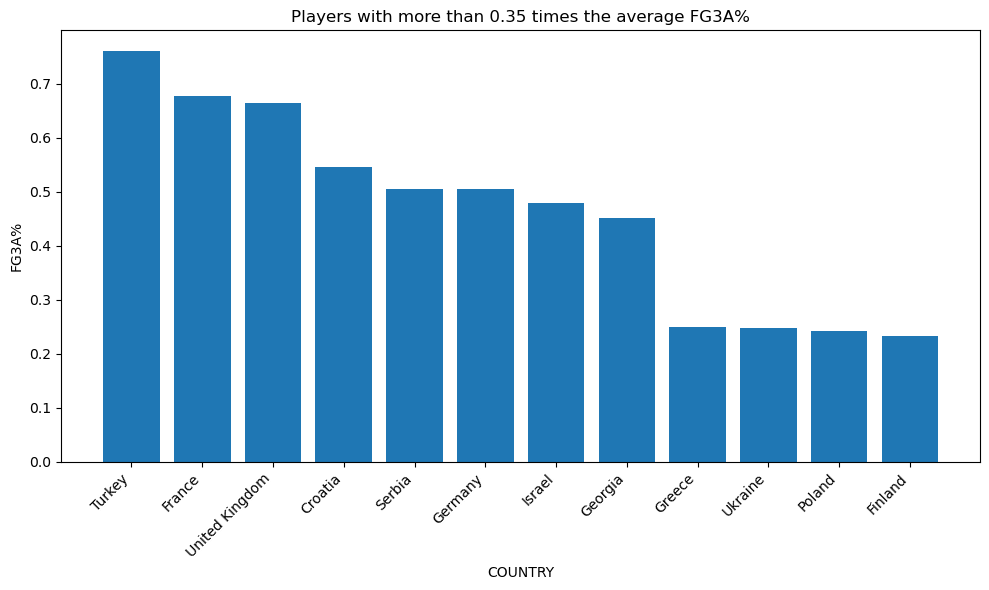

In [56]:

europe_F_regular

# Calculate average FG3A%
avg_FG3A_percentage = europe_F_regular['FG3A%'].mean()

# Filter players who have more than 0.35 times the average FG3A%
filtered_players = europe_F_regular[europe_F_regular['FG3A%'] > 0.35 * avg_FG3A_percentage]

filtered_players = filtered_players.sort_values(by='FG3A%', ascending=False)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(filtered_players['COUNTRY'], filtered_players['FG3A%'])
plt.xlabel('COUNTRY')
plt.ylabel('FG3A%')
plt.title('Players with more than 0.35 times the average FG3A%')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


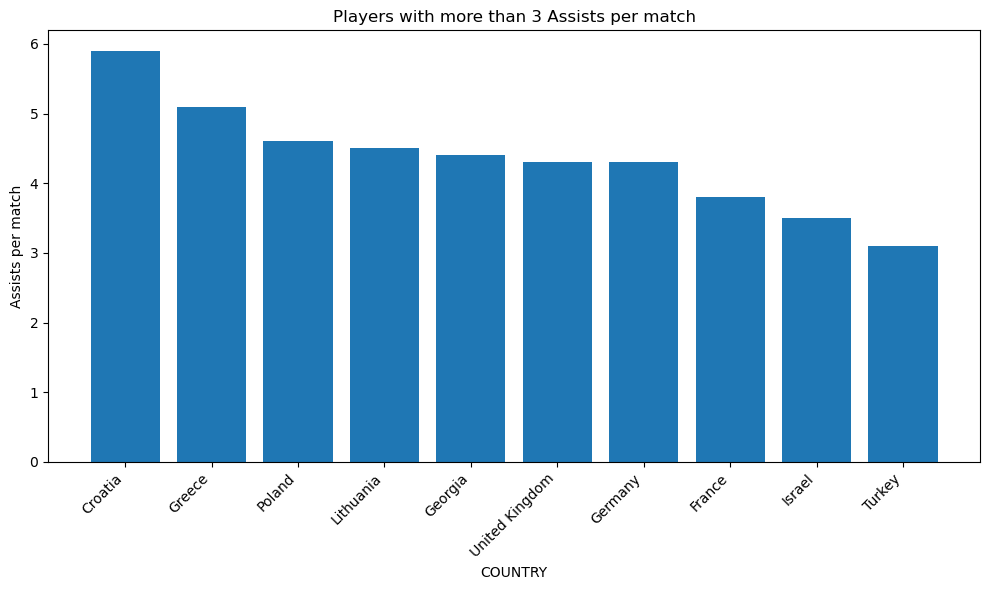

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter players who have more than 3 AST per match
filtered_players = europe_F_regular[europe_F_regular['AST'] > 3]

filtered_players = filtered_players.sort_values(by='AST', ascending=False)

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(filtered_players['COUNTRY'], filtered_players['AST'])
plt.xlabel('COUNTRY')
plt.ylabel('Assists per match')
plt.title('Players with more than 3 Assists per match')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_7722/2893479217.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'POSITION_y_x', 'POSITION_x_x'} in the result is deprecated and will raise a MergeError in a future version.
  filtered_players = filter_AST.merge(filter_FG3M, on='COUNTRY').merge(filter_FG3A, on='COUNTRY')


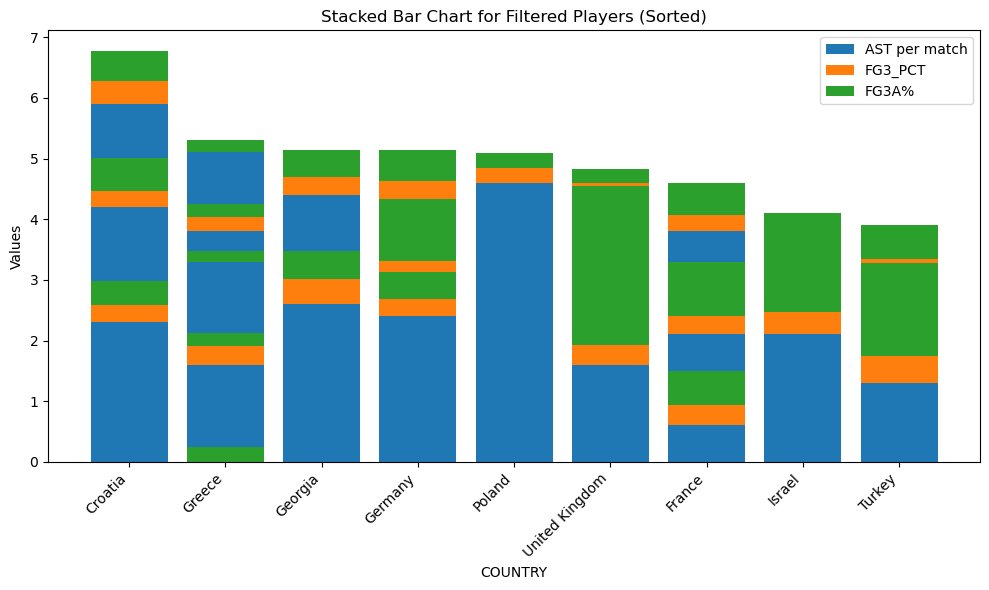

In [65]:

europe_F_regular

# Calculate average FG3_PCT and FG3A%
avg_FG3M_percentage = europe_F_regular['FG3_PCT'].mean()
avg_FG3A_percentage = europe_F_regular['FG3A%'].mean()

# Filter players who meet each condition
filter_AST = europe_F_regular[europe_F_regular['AST'] > 3]
filter_FG3M = europe_F_regular[europe_F_regular['FG3_PCT'] >= 0.3 * avg_FG3M_percentage]
filter_FG3A = europe_F_regular[europe_F_regular['FG3A%'] > 0.35 * avg_FG3A_percentage]

# Get players who meet all conditions
filtered_players = filter_AST.merge(filter_FG3M, on='COUNTRY').merge(filter_FG3A, on='COUNTRY')

# Calculate the sum of AST, FG3_PCT, and FG3A% for each player
filtered_players['total'] = filtered_players['AST'] + filtered_players['FG3_PCT'] + filtered_players['FG3A%']

# Sort players by the total in descending order
filtered_players = filtered_players.sort_values(by='total', ascending=False)

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(filtered_players['COUNTRY'], filtered_players['AST'], label='AST per match')
plt.bar(filtered_players['COUNTRY'], filtered_players['FG3_PCT'], bottom=filtered_players['AST'], label='FG3_PCT')
plt.bar(filtered_players['COUNTRY'], filtered_players['FG3A%'], bottom=filtered_players['AST'] + filtered_players['FG3_PCT'], label='FG3A%')
plt.xlabel('COUNTRY')
plt.ylabel('Values')
plt.title('Stacked Bar Chart for Filtered Players (Sorted)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_7722/4217697435.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'POSITION_y_x', 'POSITION_x_x'} in the result is deprecated and will raise a MergeError in a future version.
  filtered_players = filter_AST.merge(filter_FG3M, on='COUNTRY').merge(filter_FG3A, on='COUNTRY')


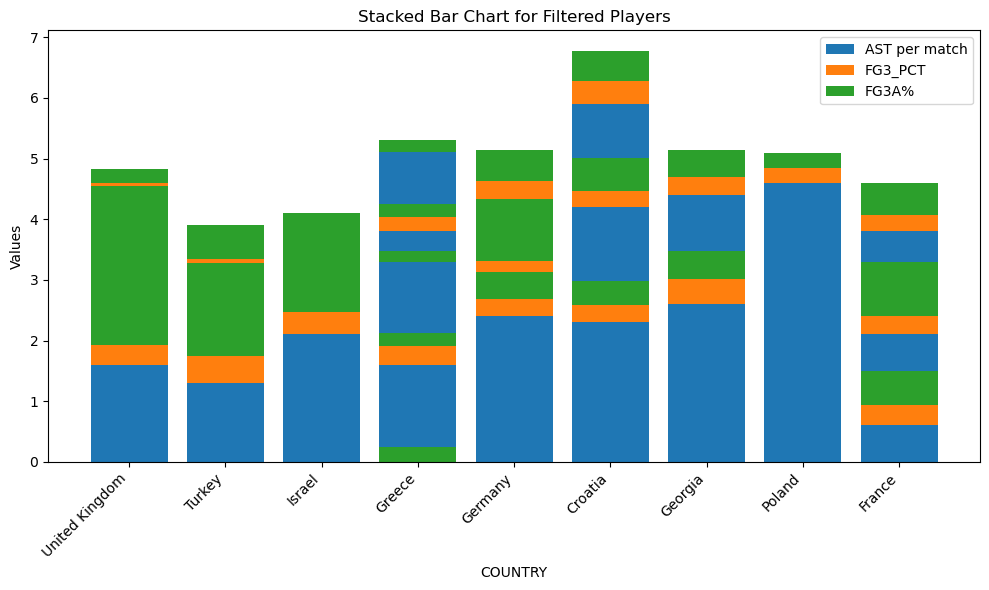

In [66]:


europe_F_regular

# Calculate average FG3_PCT and FG3A%
avg_FG3M_percentage = europe_F_regular['FG3_PCT'].mean()
avg_FG3A_percentage = europe_F_regular['FG3A%'].mean()

# Filter players who meet each condition
filter_AST = europe_F_regular[europe_F_regular['AST'] > 3]
filter_FG3M = europe_F_regular[europe_F_regular['FG3_PCT'] >= 0.3 * avg_FG3M_percentage]
filter_FG3A = europe_F_regular[europe_F_regular['FG3A%'] > 0.35 * avg_FG3A_percentage]

# Get players who meet all conditions
filtered_players = filter_AST.merge(filter_FG3M, on='COUNTRY').merge(filter_FG3A, on='COUNTRY')

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(filtered_players['COUNTRY'], filtered_players['AST'], label='AST per match')
plt.bar(filtered_players['COUNTRY'], filtered_players['FG3_PCT'], bottom=filtered_players['AST'], label='FG3_PCT')
plt.bar(filtered_players['COUNTRY'], filtered_players['FG3A%'], bottom=filtered_players['AST'] + filtered_players['FG3_PCT'], label='FG3A%')
plt.xlabel('COUNTRY')
plt.ylabel('Values')
plt.title('Stacked Bar Chart for Filtered Players')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [71]:
europe_F_regular

,PLAYER_ID_x,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,Year,Season,COLLEGE,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,JERSEY_NUMBER,POSITION_x,HEIGHT,WEIGHT_x,FROM_YEAR,TO_YEAR,TEMP_PLAYER_ID,PLAYER_ID_y,FIRST_NAME,LAST_NAME,POSITION_y,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT_y,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,SeasonYear,HAND_WIDTH_FILLED,HAND_LENGTH_FILLED,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV,POSSESSION,POSITION,Europe
243,2238,Antonis Fotsis,1610612763,MEM,21.0,28,6,22,0.214,50.4,6.7,16.5,0.404,1.1,3.7,0.304,2.7,3.2,0.850,4.0,5.9,9.8,1.6,3.3,1.4,1.7,1.4,3.5,0.0,17.1,2001-02,Regular Season,NaN,Greece,2001,2,47,6,F,6-10,219.0,2001,2001,NaN,2238,Antonis,Fotsis,SF,81.25,6' 9.25'',NaN,NaN,219.0,80.50,6' 8.5'',106.0,8' 10'',NaN,NaN,NaN,2000-01,9.418394,8.723769,0.224242,1.036364,0.164179,0.193939,0.474473,0.484848,17.208,F,European
1105,2443,Darius Songaila,1610612758,SAC,26.0,73,49,24,0.671,50.6,6.9,14.2,0.487,0.0,0.0,0.000,3.7,4.6,0.807,4.7,7.0,11.7,2.5,2.2,2.2,0.6,1.9,6.5,0.0,17.5,2003-04,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.000000,1.232394,0.000000,0.323944,0.534025,1.136364,13.724,F,European
1107,2443,Darius Songaila,1610612758,SAC,27.0,81,50,31,0.617,51.2,7.9,15.1,0.527,0.0,0.1,0.000,2.9,3.4,0.847,3.9,6.8,10.6,3.5,2.2,1.6,0.6,1.3,6.4,0.0,18.8,2004-05,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.006623,1.245033,0.000000,0.225166,0.562369,1.590909,14.896,F,European
1109,2443,Darius Songaila,1610612741,CHI,28.0,62,27,35,0.435,50.9,9.0,18.8,0.481,0.1,0.2,0.400,3.6,4.4,0.817,2.9,6.5,9.4,3.4,3.3,1.3,0.6,0.8,6.0,4.5,21.8,2005-06,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.010638,1.159574,0.011111,0.234043,0.521781,1.030303,21.136,F,European
1110,2443,Darius Songaila,1610612764,WAS,29.0,37,14,23,0.378,50.0,8.4,16.1,0.524,0.0,0.1,0.000,3.3,3.9,0.852,3.1,6.4,9.6,2.7,3.1,1.2,0.7,1.1,7.5,3.3,20.1,2006-07,Regular Season,Wake Forest,Lithuania,2002,2,49,25,F,6-9,248.0,2003,2010,NaN,2443,Darius,Songaila,PF,80.00,6' 8'',NaN,NaN,240.0,85.00,7' 1'',108.5,9' 0.5'',NaN,NaN,NaN,2002-03,9.418394,8.723769,0.006211,1.248447,0.000000,0.242236,0.559811,0.870968,17.816,F,European
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7717,1630582,Yves Pons,1610612763,MEM,23.0,12,9,3,0.750,45.5,3.2,10.3,0.313,1.9,5.8,0.333,0.0,1.3,0.000,3.2,4.5,7.7,0.6,0.6,0.6,2.6,0.6,3.8,1.9,8.3,2021-22,Regular Season,Tennessee,France,Undrafted,Undrafted,Undrafted,5,F,6-5,206.0,2021,2021,1630582.0,1630582,Yves,Pons,PF,77.50,6'5.5'',78.75,6'6.75'',206.4,84.75,7'0.75'',104.0,8'8.0'',4.0,9.00,9.25,2021-22,9.250000,9.000000,0.563107,0.805825,0.593750,0.126214,0.380124,1.000000,8.272,F,European
7750,1631110,Jeremy Sochan,1610612759,SAS,20.0,56,15,41,0.268,47.0,8.1,17.8,0.453,1.1,4.3,0.246,2.6,3.7,0.698,3.1,6.4,9.5,4.6,3.1,1.4,0.7,1.5,4.5,3.2,19.8,2022-23,Regular Season,Baylor,Poland,2022,1,9,10,F,6-8,230.0,2022,2023,1631110.0,1631110,Jeremy,Sochan,PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-23,9.418394,8.723769,0.241573,1.112360,0.135802,0.207865,0.506200,1.483871,19.428,F,European
7771,1631217,Moussa Diabate,1610612746,LAC,21.0,22,10,12,0.455,47.3,5.8,11.4,0.51

/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_7722/3094324866.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'POSITION_y_x', 'POSITION_x_x'} in the result is deprecated and will raise a MergeError in a future version.
  filtered_players = filter_AST.merge(filter_FG3M, on='PLAYER_ID_x').merge(filter_FG3A, on='PLAYER_ID_x')
/var/folders/7h/233xrn2x20n5883dfdqwt5zr0000gn/T/ipykernel_7722/3094324866.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_players = filtered_players.groupby('COUNTRY').sum()


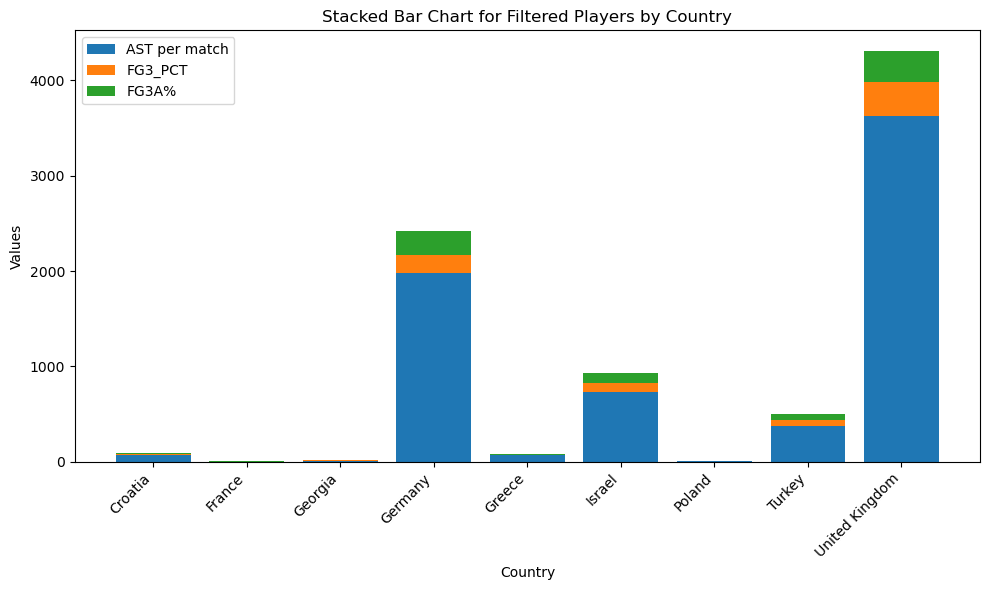

In [69]:

europe_F_regular

# Calculate average FG3_PCT and FG3A%
avg_FG3M_percentage = europe_F_regular['FG3_PCT'].mean()
avg_FG3A_percentage = europe_F_regular['FG3A%'].mean()

# Filter players who meet each condition
filter_AST = europe_F_regular[europe_F_regular['AST'] > 3]
filter_FG3M = europe_F_regular[europe_F_regular['FG3_PCT'] >= 0.3 * avg_FG3M_percentage]
filter_FG3A = europe_F_regular[europe_F_regular['FG3A%'] > 0.35 * avg_FG3A_percentage]

# Get players who meet all conditions
filtered_players = filter_AST.merge(filter_FG3M, on='PLAYER_ID_x').merge(filter_FG3A, on='PLAYER_ID_x')

# Calculate the sum of AST, FG3_PCT, and FG3A% for each player
filtered_players['total'] = filtered_players['AST'] + filtered_players['FG3_PCT'] + filtered_players['FG3A%']

# Sort players by the total in descending order
filtered_players = filtered_players.sort_values(by='total', ascending=False)

# Group by country and aggregate the sum of values
grouped_players = filtered_players.groupby('COUNTRY').sum()

# Create a stacked bar chart for each country
plt.figure(figsize=(10, 6))
plt.bar(grouped_players.index, grouped_players['AST'], label='AST per match')
plt.bar(grouped_players.index, grouped_players['FG3_PCT'], bottom=grouped_players['AST'], label='FG3_PCT')
plt.bar(grouped_players.index, grouped_players['FG3A%'], bottom=grouped_players['AST'] + grouped_players['FG3_PCT'], label='FG3A%')
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Stacked Bar Chart for Filtered Players by Country')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
